<a href="https://colab.research.google.com/github/kleeresearch/happiness/blob/main/Happiness_analysis3_korean_Gu_2020_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Korea Happiness:** Model-Based Analysis

Summer Institute in Computational Social Science (SICSS-Korea) 2024 Team Proeject Extension

**Author**: Kyungmin Lee (kmlee@udel.edu)

**Team Members (ABC order)**: Inkoo Kang, Ju Hee Jeung, Kyungmin Lee, Yumi Park



Date: Sep 15, 2024

This notebook shows **Gu level** analysis in whole **South Korea**.

Please note that the socioeconomic dataset is limited to following factors compared to Seoul City Districts level.

* Employment Count (Korea, 2020-2021)
* Job Openings (Korea, 2020-2021)
* Job Seekers (Korea, Only 2021 available)
* Education Level (Korea, 2020-2021)
* Number of Trainees (Korea, 2020-2021)
* Cantril Ladder (Korea, 2020-2021)
* COVID (Korea, 2020-2021)
* Happiness Score (Korea, 2020-2021) - independent variables.


The below factros are limited to Seoul Districts:
* GRDP (Seoul, 2021)
* Land price (Seoul, 2021)
* Air quality (Seoul, 2020-2021)
* Precipitation (Seoul, 2021)

There are couple of notes:
1. The happiness survey 2020 and 2021 have different "GuGun" codes. Also, some socioeconomic datasets used different "GuGun"codes not based on stadard codes (대한민국 행정동 표준시군구코드). So, it is required to combine dataset based on the Gu **name** rather than gu level 5 digit code.

2. As a result of using the OLS with limited avaiable socioeconomic dataset, R square of the OLS analysis is lower than the one of Seoul Districts (See notebook "analysis2_Seoul_Gu_2021.ipynb). To solve this issues, moe avilable datasets (e.g. GRDP, land price, air quality, precipitation at Gu/Gun level in South Korea) or diverse variables can be more added for the future analysis.  

However, this notebook provides information why the research is focused on Seoul case study and present the whole South Korean trends.


Date: Dec 13


Data update integrated by Yumi Park.

2020-preliminary data: https://drive.google.com/drive/u/0/folders/1ngqZMypU3sEyv1lP4MInzyUDUfo1n_OY


2021 data: https://drive.google.com/drive/u/0/folders/1dwI5vlga9vCRMlMR0ExUJYjdZYPO907P



* A1: happiness score (10-likert scale)

* C1: happiness ladder score (10-likert scale)

# Loading Data

In [1]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gp

import pyreadstat
import zipfile

import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point

import statsmodels.formula.api as sm
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# - Directory to Shared Drive
ROOT_DIR = '/content/drive/Shareddrives/SICSS_2024_groupproject/2_data/'
DATA_DIR = 'data-korea'
DATA_DIR = os.path.join(ROOT_DIR, DATA_DIR)

##Data Dictionary

In [ ]:
# Dictionary for translation
translation_dict1 = {
    '강원도': 'Gangwon-do',
    '경기도': 'Gyeonggi-do',
    '경상남도': 'Gyeongsangnam-do',
    '경상북도': 'Gyeongsangbuk-do',
    '광주광역시': 'Gwangju',
    '대구광역시': 'Daegu',
    '부산광역시': 'Busan',
    '대전광역시': 'Daejeon',
    '서울특별시': 'Seoul',
    '울산광역시': 'Ulsan',
    '인천광역시': 'Incheon',
    '전라남도': 'Jeollanam-do',
    '전라북도': 'Jeollabuk-do',
    '제주특별자치도': 'Jeju',
    '제주도': 'Jeju',
    '충청남도': 'Chungcheongnam-do',
    '충청북도': 'Chungcheongbuk-do',
    '세종특별자치시': 'Sejong-si',
    '강원특별자치도': 'Gangwon-do',
    '전북특별차지도': 'Jeollabuk-do',
    None: None  # Keeping None as None
}

# Dictionary for translation
translation_dict2 = {
    '춘천시': 'Chuncheon',
    '원주시': 'Wonju',
    '강릉시': 'Gangneung',
    '동해시': 'Donghae',
    '태백시': 'Taebaek',
    '속초시': 'Sokcho',
    '삼척시': 'Samcheok',
    '홍천군': 'Hongcheon',
    '횡성군': 'Hoengseong',
    '영월군': 'Yeongwol',
    '평창군': 'Pyeongchang',
    '정선군': 'Jeongseon',
    '양양군': 'Yangyang',
    '화천군': 'Hwacheon',
    '고성군': 'Goseong',
    '양구군': 'Yanggu',
    '철원군': 'Cheorwon',
    '인제군': 'Inje',
    '수원시': 'Suwon',
    '성남시': 'Seongnam',
    '의정부시': 'Uijeongbu',
    '안양시': 'Anyang',
    '광명시': 'Gwangmyeong',
    '평택시': 'Pyeongtaek',
    '안산시': 'Ansan',
    '과천시': 'Gwacheon',
    '구리시': 'Guri',
    '남양주시': 'Namyangju',
    '오산시': 'Osan',
    '시흥시': 'Siheung',
    '군포시': 'Gunpo',
    '의왕시': 'Uiwang',
    '하남시': 'Hanam',
    '용인시': 'Yongin',
    '이천시': 'Icheon',
    '안성시': 'Anseong',
    '광주시': 'Gwangju',
    '여주시': 'Yeoju',
    '가평군': 'Gapyeong',
    '양평군': 'Yangpyeong',
    '부천시': 'Bucheon',
    '동두천시': 'Dongducheon',
    '고양시': 'Goyang',
    '양주시': 'Yangju',
    '포천시': 'Pocheon',
    '화성시': 'Hwaseong',
    '연천군': 'Yeoncheon',
    '김포시': 'Gimpo',
    '파주시': 'Paju',
    '창원시': 'Changwon',
    '진주시': 'Jinju',
    '통영시': 'Tongyeong',
    '사천시': 'Sacheon',
    '김해시': 'Gimhae',
    '밀양시': 'Miryang',
    '거제시': 'Geoje',
    '양산시': 'Yangsan',
    '의령군': 'Uiryeong',
    '함안군': 'Haman',
    '창녕군': 'Changnyeong',
    '남해군': 'Namhae',
    '하동군': 'Hadong',
    '산청군': 'Sancheong',
    '함양군': 'Hamyang',
    '거창군': 'Geochang',
    '합천군': 'Hapcheon',
    '포항시': 'Pohang',
    '경주시': 'Gyeongju',
    '김천시': 'Gimcheon',
    '안동시': 'Andong',
    '구미시': 'Gumi',
    '영주시': 'Yeongju',
    '영천시': 'Yeongcheon',
    '상주시': 'Sangju',
    '문경시': 'Mungyeong',
    '경산시': 'Gyeongsan',
    '의성군': 'Uiseong',
    '청송군': 'Cheongsong',
    '영양군': 'Yeongyang',
    '영덕군': 'Yeongdeok',
    '청도군': 'Cheongdo',
    '고령군': 'Goryeong',
    '성주군': 'Seongju',
    '칠곡군': 'Chilgok',
    '예천군': 'Yecheon',
    '봉화군': 'Bonghwa',
    '울진군': 'Uljin',
    '울릉군': 'Ulleung',
    '동구': 'Dong-gu',
    '서구': 'Seo-gu',
    '남구': 'Nam-gu',
    '북구': 'Buk-gu',
    '광산구': 'Gwangsan-gu',
    '중구': 'Jung-gu',
    '수성구': 'Suseong-gu',
    '달서구': 'Dalseo-gu',
    '달성군': 'Dalseong-gun',
    '군위군': 'Gunwi-gun',
    '영도구': 'Yeongdo-gu',
    '부산진구': 'Busanjin-gu',
    '동래구': 'Dongnae-gu',
    '해운대구': 'Haeundae-gu',
    '사하구': 'Saha-gu',
    '금정구': 'Geumjeong-gu',
    '강서구': 'Gangseo-gu',
    '연제구': 'Yeonje-gu',
    '수영구': 'Suyeong-gu',
    '사상구': 'Sasang-gu',
    '기장군': 'Gijang-gun',
    '유성구': 'Yuseong-gu',
    '대덕구': 'Daedeok-gu',
    '종로구': 'Jongno-gu',
    '용산구': 'Yongsan-gu',
    '성동구': 'Seongdong-gu',
    '광진구': 'Gwangjin-gu',
    '동대문구': 'Dongdaemun-gu',
    '중랑구': 'Jungnang-gu',
    '성북구': 'Seongbuk-gu',
    '강북구': 'Gangbuk-gu',
    '도봉구': 'Dobong-gu',
    '노원구': 'Nowon-gu',
    '은평구': 'Eunpyeong-gu',
    '서대문구': 'Seodaemun-gu',
    '마포구': 'Mapo-gu',
    '양천구': 'Yangcheon-gu',
    '구로구': 'Guro-gu',
    '금천구': 'Geumcheon-gu',
    '영등포구': 'Yeongdeungpo-gu',
    '동작구': 'Dongjak-gu',
    '관악구': 'Gwanak-gu',
    '서초구': 'Seocho-gu',
    '강남구': 'Gangnam-gu',
    '송파구': 'Songpa-gu',
    '강동구': 'Gangdong-gu',
    '울주군': 'Ulju-gun',
    '미추홀구': 'Michuhol-gu',
    '연수구': 'Yeonsu-gu',
    '남동구': 'Namdong-gu',
    '부평구': 'Bupyeong-gu',
    '계양구': 'Gyeyang-gu',
    '강화군': 'Ganghwa-gun',
    '옹진군': 'Ongjin-gun',
    '목포시': 'Mokpo',
    '여수시': 'Yeosu',
    '순천시': 'Suncheon',
    '나주시': 'Naju',
    '광양시': 'Gwangyang',
    '담양군': 'Damyang-gun',
    '곡성군': 'Gokseong-gun',
    '구례군': 'Gurye-gun',
    '고흥군': 'Goheung-gun',
    '보성군': 'Boseong-gun',
    '화순군': 'Hwasun-gun',
    '장흥군': 'Jangheung-gun',
    '강진군': 'Gangjin-gun',
    '해남군': 'Haenam-gun',
    '영암군': 'Yeongam-gun',
    '무안군': 'Muan-gun',
    '함평군': 'Hampyeong-gun',
    '영광군': 'Yeonggwang-gun',
    '장성군': 'Jangseong-gun',
    '완도군': 'Wando-gun',
    '진도군': 'Jindo-gun',
    '신안군': 'Sinan-gun',
    '전주시': 'Jeonju',
    '군산시': 'Gunsan',
    '익산시': 'Iksan',
    '정읍시': 'Jeongeup',
    '남원시': 'Namwon',
    '김제시': 'Gimje',
    '완주군': 'Wanju-gun',
    '진안군': 'Jinan-gun',
    '무주군': 'Muju-gun',
    '장수군': 'Jangsu-gun',
    '임실군': 'Imsil-gun',
    '순창군': 'Sunchang-gun',
    '고창군': 'Gochang-gun',
    '부안군': 'Buan-gun',
    '제주시': 'Jeju',
    '서귀포시': 'Seogwipo',
    '천안시': 'Cheonan',
    '공주시': 'Gongju',
    '보령시': 'Boryeong',
    '아산시': 'Asan',
    '서산시': 'Seosan',
    '논산시': 'Nonsan',
    '계룡시': 'Gyeryong',
    '당진시': 'Dangjin',
    '금산군': 'Geumsan-gun',
    '부여군': 'Buyeo-gun',
    '서천군': 'Seocheon-gun',
    '청양군': 'Cheongyang-gun',
    '홍성군': 'Hongseong-gun',
    '예산군': 'Yesan-gun',
    '태안군': 'Taean-gun',
    '청주시': 'Cheongju',
    '충주시': 'Chungju',
    '제천시': 'Jecheon',
    '보은군': 'Boeun-gun',
    '옥천군': 'Okcheon-gun',
    '영동군': 'Yeongdong-gun',
    '증평군': 'Jeungpyeong-gun',
    '진천군': 'Jincheon-gun',
    '괴산군': 'Goesan-gun',
    '음성군': 'Eumseong-gun',
    '단양군': 'Danyang-gun',
    '전주시 덕진구': 'Deokjin-gu, Jeonju',
    '고양시 덕양구': 'Deogyang-gu, Goyang',
    '수원시 권선구': 'Gwonseon-gu, Suwon',
    '안양시 만안구': 'Manan-gu, Anyang',
    '성남시 분당구': 'Bundang-gu, Seongnam',
    '고양시 일산서구': 'Ilsanseo-gu, Goyang',
    '창원시 마산합포구': 'Masan Happo-gu, Changwon',
    '안양시 동안구': 'Dongan-gu, Anyang',
    '천안시 동남구': 'Dongnam-gu, Cheonan',
    '수원시 영통구': 'Yeongtong-gu, Suwon',
    '고양시 일산동구': 'Ilsandong-gu, Goyang',
    '천안시 서북구': 'Seobuk-gu, Cheonan',
    '용인시 수지구': 'Suji-gu, Yongin',
    '수원시 장안구': 'Jangan-gu, Suwon',
    '용인시 처인구': 'Cheoin-gu, Yongin',
    '성남시 수정구': 'Sujeong-gu, Seongnam',
    '성남시 중원구': 'Jungwon-gu, Seongnam',
    '안산시 단원구': 'Danwon-gu, Ansan',
    '안산시 상록구': 'Sangnok-gu, Ansan',
    '창원시 의창구': 'Uichang-gu, Changwon',
    '창원시 성산구': 'Seongsan-gu, Changwon',
    '창원시 마산회원구': 'Masanhoewon-gu, Changwon',
    '용인시 기흥구': 'Giheung-gu, Yongin',
    '창원시 진해구': 'Jinhae-gu, Changwon',
    '청주시 상당구': 'Sangdang-gu, Cheongju',
    '세종시': 'Sejong-si',
    '청주시 청원구': 'Cheongwon-gu, Cheongju',
    '청주시 흥덕구': 'Heungdeok-gu, Cheongju',
    '수원시 팔달구': 'Paldal-gu, Suwon',
    '포항시 남구': 'Nam-gu, Pohang',
    '청주시 서원구': 'Seowon-gu, Cheongju',
    '포항시 북구': 'Buk-gu, Pohang',
    '전주시 완산구': 'Wansan-gu, Jeonju',
    '제주도시': 'Jeju City',
}

translation_dict3 =  {'서울': 'Seoul',
                    '부산': 'Busan',
                    '대구': 'Daegu',
                    '인천': 'Incheon',
                    '광주': 'Gwangju',
                    '대전': 'Daejeon',
                    '울산': 'Ulsan',
                    '세종': 'Sejong-si',
                    '경기': 'Gyeonggi-do',
                    '강원': 'Gangwon-do',
                    '충북': 'Chungcheongbuk-do',
                    '충남': 'Chungcheongnam-do',
                    '전북': 'Jeollabuk-do',
                    '전남': 'Jeollanam-do',
                    '경북': 'Gyeongsangbuk-do',
                    '경남': 'Gyeongsangnam-do',
                    '제주': 'Jeju'}

2021 data: https://drive.google.com/drive/u/0/folders/1dwI5vlga9vCRMlMR0ExUJYjdZYPO907P



In [ ]:
df = pd.read_excel(os.path.join(DATA_DIR,"clean/happiness_2020-2021.xlsx"))
df

,id,type,id_coa,gagu,sido_cd,gugun_cd,year,sido,gugun,sigungu_new,세부시군구코드,광역시군구코드,strataid,wt,sq0,sq1_2,sq1_3,sq1_4_1,sq1_4_2,marriage,age,housing,housety,housety_t,underlivlyihood,multicul,familyty,a1,a2_1,a2_2,a2_3,a3_1,a3_2,a3_3,a3_4,a3_5,b1_1,b1_2,b1_3,b1_4,b1_5,b1_6,b1_7,b1_8,b1_9,b1_10,b2,b3,c1,c2,c3,c4,c5,c6,c7_1,c7_2,c7_3,c7_4,c7_5,c7_6,c7_7,c7_8,c8,d1_1,d1_2,d1_3,d1_4,d1_5,d1_6,d1_7,d1_8,d1_9,d1_10,d1_11,d2_1,d2_2,d2_3,d2_4,d2_5,d2_6,d33_1,d33_2,d33_3,d33_4,d33_5,d33_6,d33_7,d3_1,d3_2,d3_3,d3_4,d3_5,d3_6,d3_7,d3_8,d3_9,d3_10,d3_11,d55_1,d55_2,d55_3,d55_4,d55_5,d55_6,d55_7,d4_1,d4_2,d4_3,d77_1,d77_2,d5_1,d5_2,d5_3,d6,d7,d8_1,d8_2,d8_3,d8_4,d8_5,d8_6,d8_7,d8_8,d8_9,d8_10,d8_11,d9_1_1,d9_1_2,d9_2_1,d9_2_2,d10_1_1,d10_1_2,d10_2_1,d10_2_2,d11,d12_1,d12_2,d12_3,d12_4,d12_5,d12_6,d19_1,d19_2,d19_3,d19_4,d19_5,d19_6,d19_7,d19_8,d19_9,d19_10,d19_11,d19_12,d19_13,d19_14,e1_1_1,e1_1_2,e1_2_1,e1_2_2,e2_1,e2_2,e2_3,e2_4,e2_5,e2_6,e2_7,e2_8,e2_9,e2_10,e3_1,e3_2,e4,e5,e6_1,e6_2,e6_3,e6_4,e6_5,e6_6,e6_7,e7,e8,e9_1,e9_2,e9_3,e9_4,e9_5,e9_6,e9_7,dq1_1_1,dq1_1_2,dq1_1_3,dq1_2_1,dq1_2_2,dq1_2_3,dq3,dq2,dq2t,dq4,dp9,dp9t,dp7,dp8,d10,dq11,dq11t,dq12_1,dq12_2,dq13,dq14,dq16,dq17,dq18yn,dq19,covid,sex,sigungu_cd,strata_cd,p_coa,s_coa,p_gagu,s_gagu,t_gaguwon,p_gaguwon,s_gaguwon,ageband,area,poststrata,wt1,wt2,wt3,wt123,p_ingu,s_ingu,wt_p,wt_s,wt_p1,wt_s1,sq1_1,sq1_6,sq1_7,a1_1,d1_12,d1_13,d1_14,d1_15,d1_16,d1_17,d1_18,d1_19,d1_20,d5_1_1,d5_1_2,d5_1_3,d5_1_4,d5_1_5,d5_1_6,d5_1_7,d5_1_8,d5_1_9,d5_1_10,d5_1_11,d5_1_12,d5_1_13,d5_1_14,d5_1_15,d5_1_16,d5_1_17,d5_1_18,d5_1_19,d5_1_20,d5_1_21,d5_1_22,d5_1_23,d5_1_24,d5_1_25,d5_1_26,d5_1_27,d5_1_28,d5_1_29,d5_1_29t,d5_1_30,d5_2_1,d5_2_2,d5_2_3,d5_2_4,d5_2_5,d5_2_6,d5_2_7,d5_2_8,d5_2_9,d5_2_10,d5_2_11,d5_2_12,d5_2_13,d5_2_14,d5_2_15,d5_2_16,d5_2_17,d5_2_18,d5_2_19,d5_2_20,d5_2_21,d5_2_22,d5_2_23,d5_2_24,d5_2_25,d5_2_26,d5_2_27,d5_2_28,d5_2_29,d5_2_29t,d5_2_30,d5_3_1,d5_3_2,d5_3_3,d5_3_4,d5_3_5,d5_3_6,d5_3_7,d5_3_8,d5_3_9,d5_3_10,d5_3_11,d5_3_12,d5_3_13,d5_3_14,d5_3_15,d5_3_16,d5_3_17,d5_3_18,d5_3_19,d5_3_20,d5_3_21,d5_3_22,d5_3_23,d5_3_24,d5_3_25,d5_3_26,d5_3_27,d5_3_28,d5_3_29,d5_3_29t,d5_3_30,d13,d14,d15,d16,d17,d18,e3_3,e5_1,e5_2,e5_3,e5_4,e5_5,e5_6,e5_7,e5_8,e5_9,e8_1,e8_2,e8_3,e8_4,e8_5,e8_6,e8_7,e8_8,e8_9,dq4_1,dq4_2,dq4_99,dq5_1,dq5_2,dq5_99,dq6_1,dq6_2,dq6_99,dq7,dq8,dq9,dq9t,dq10,dq11_t,dq15_1,dq15_2,dq15_3,dq15_4,dq15_5,dq18,dq18t,SO2,CO,Ozone,NO2,PM10,PM2.5,trainee,grdpno,land,empl,jobopen,edu,jobseeker
0,10042,NaN,1102057010009,105,11,11020,2021,서울,중구,서울중구,11020,11020,NaN,NaN,NaN,3,1,1992,11,1,29,1,4,NaN,3,2,5,NaN,6,8,7,5,5,4,5,5,8,6,3,2,2,2,3,3,7,5,6,7,6,6,7,6.0,-1.0,-1.0,6,4,5,6,3,5,5,5,6,4,4,4,4,4,4,4,4,4,4,4,4,3,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,4,NaN,NaN,NaN,NaN,NaN,3,3,4,3,2,4,4,3,3,2,4,3,3,10,20,90,80,20,30,80,70,6,4,4,3,4,3,3,3,2,3,2,3,3,2,4,3,2,3,3,3,3,7,0,22,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,23,NaN,2,7,8,3,3,4,1,22,NaN,7,8,3,6,1,4,4,5,3,3,1.0,1.0,1.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,6,6,200,2,0,2,NaN,7,5,1,11020,11111.0,1278.0,9.0,232.0,12.0,3.0,3.0,3.0,2.0,11.0,1112.0,142.0,19.333333,1.000000,2745.333333,692283.0,7.884513e+05,2410.481788,0.919634,2432.890148,0.928183,3.0,2.0,1.0,7.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,NaN,18.0,30.0,NaN,0.0,30.0,NaN,1.0,1.0,NaN,NaN,3.0,NaN,1.0,1.0,1.0,1.0,1.0,9.0,NaN,0.003,0.50,0.02600,0.027,42.0,21.00,2538.0,56070505.0,4.551,2678.0,10091.0,0.02600,3.890227
1,10012,NaN,1102057010009,103,11,1102

In [ ]:
df.columns

Index(['id', 'type', 'id_coa', 'gagu', 'sido_cd', 'gugun_cd', 'year', 'sido',
       'gugun', 'sigungu_new',
       ...
       'NO2', 'PM10', 'PM2.5', 'trainee', 'grdpno', 'land', 'empl', 'jobopen',
       'edu', 'jobseeker'],
      dtype='object', length=404)

In [ ]:
df["sido"] = df["sido"].map(translation_dict3)
df["gugun"] = df["gugun"].map(translation_dict2)
df.shape

(45005, 404)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,id,type,id_coa,gagu,sido_cd,gugun_cd,year,sido,gugun,sigungu_new,세부시군구코드,광역시군구코드,strataid,wt,sq0,sq1_2,sq1_3,sq1_4_1,sq1_4_2,marriage,age,housing,housety,housety_t,underlivlyihood,multicul,familyty,a1,a2_1,a2_2,a2_3,a3_1,a3_2,a3_3,a3_4,a3_5,b1_1,b1_2,b1_3,b1_4,b1_5,b1_6,b1_7,b1_8,b1_9,b1_10,b2,b3,c1,c2,c3,c4,c5,c6,c7_1,c7_2,c7_3,c7_4,c7_5,c7_6,c7_7,c7_8,c8,d1_1,d1_2,d1_3,d1_4,d1_5,d1_6,d1_7,d1_8,d1_9,d1_10,d1_11,d2_1,d2_2,d2_3,d2_4,d2_5,d2_6,d33_1,d33_2,d33_3,d33_4,d33_5,d33_6,d33_7,d3_1,d3_2,d3_3,d3_4,d3_5,d3_6,d3_7,d3_8,d3_9,d3_10,d3_11,d55_1,d55_2,d55_3,d55_4,d55_5,d55_6,d55_7,d4_1,d4_2,d4_3,d77_1,d77_2,d5_1,d5_2,d5_3,d6,d7,d8_1,d8_2,d8_3,d8_4,d8_5,d8_6,d8_7,d8_8,d8_9,d8_10,d8_11,d9_1_1,d9_1_2,d9_2_1,d9_2_2,d10_1_1,d10_1_2,d10_2_1,d10_2_2,d11,d12_1,d12_2,d12_3,d12_4,d12_5,d12_6,d19_1,d19_2,d19_3,d19_4,d19_5,d19_6,d19_7,d19_8,d19_9,d19_10,d19_11,d19_12,d19_13,d19_14,e1_1_1,e1_1_2,e1_2_1,e1_2_2,e2_1,e2_2,e2_3,e2_4,e2_5,e2_6,e2_7,e2_8,e2_9,e2_10,e3_1,e3_2,e4,e5,e6_1,e6_2,e6_3,e6_4,e6_5,e6_6,e6_7,e7,e8,e9_1,e9_2,e9_3,e9_4,e9_5,e9_6,e9_7,dq1_1_1,dq1_1_2,dq1_1_3,dq1_2_1,dq1_2_2,dq1_2_3,dq3,dq2,dq2t,dq4,dp9,dp9t,dp7,dp8,d10,dq11,dq11t,dq12_1,dq12_2,dq13,dq14,dq16,dq17,dq18yn,dq19,covid,sex,sigungu_cd,strata_cd,p_coa,s_coa,p_gagu,s_gagu,t_gaguwon,p_gaguwon,s_gaguwon,ageband,area,poststrata,wt1,wt2,wt3,wt123,p_ingu,s_ingu,wt_p,wt_s,wt_p1,wt_s1,sq1_1,sq1_6,sq1_7,a1_1,d1_12,d1_13,d1_14,d1_15,d1_16,d1_17,d1_18,d1_19,d1_20,d5_1_1,d5_1_2,d5_1_3,d5_1_4,d5_1_5,d5_1_6,d5_1_7,d5_1_8,d5_1_9,d5_1_10,d5_1_11,d5_1_12,d5_1_13,d5_1_14,d5_1_15,d5_1_16,d5_1_17,d5_1_18,d5_1_19,d5_1_20,d5_1_21,d5_1_22,d5_1_23,d5_1_24,d5_1_25,d5_1_26,d5_1_27,d5_1_28,d5_1_29,d5_1_29t,d5_1_30,d5_2_1,d5_2_2,d5_2_3,d5_2_4,d5_2_5,d5_2_6,d5_2_7,d5_2_8,d5_2_9,d5_2_10,d5_2_11,d5_2_12,d5_2_13,d5_2_14,d5_2_15,d5_2_16,d5_2_17,d5_2_18,d5_2_19,d5_2_20,d5_2_21,d5_2_22,d5_2_23,d5_2_24,d5_2_25,d5_2_26,d5_2_27,d5_2_28,d5_2_29,d5_2_29t,d5_2_30,d5_3_1,d5_3_2,d5_3_3,d5_3_4,d5_3_5,d5_3_6,d5_3_7,d5_3_8,d5_3_9,d5_3_10,d5_3_11,d5_3_12,d5_3_13,d5_3_14,d5_3_15,d5_3_16,d5_3_17,d5_3_18,d5_3_19,d5_3_20,d5_3_21,d5_3_22,d5_3_23,d5_3_24,d5_3_25,d5_3_26,d5_3_27,d5_3_28,d5_3_29,d5_3_29t,d5_3_30,d13,d14,d15,d16,d17,d18,e3_3,e5_1,e5_2,e5_3,e5_4,e5_5,e5_6,e5_7,e5_8,e5_9,e8_1,e8_2,e8_3,e8_4,e8_5,e8_6,e8_7,e8_8,e8_9,dq4_1,dq4_2,dq4_99,dq5_1,dq5_2,dq5_99,dq6_1,dq6_2,dq6_99,dq7,dq8,dq9,dq9t,dq10,dq11_t,dq15_1,dq15_2,dq15_3,dq15_4,dq15_5,dq18,dq18t,SO2,CO,Ozone,NO2,PM10,PM2.5,trainee,grdpno,land,empl,jobopen,edu,jobseeker
0,10042,NaN,1102057010009,105,11,11020,2021,Seoul,Jung-gu,서울중구,11020,11020,NaN,NaN,NaN,3,1,1992,11,1,29,1,4,NaN,3,2,5,NaN,6,8,7,5,5,4,5,5,8,6,3,2,2,2,3,3,7,5,6,7,6,6,7,6.0,-1.0,-1.0,6,4,5,6,3,5,5,5,6,4,4,4,4,4,4,4,4,4,4,4,4,3,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,4,NaN,NaN,NaN,NaN,NaN,3,3,4,3,2,4,4,3,3,2,4,3,3,10,20,90,80,20,30,80,70,6,4,4,3,4,3,3,3,2,3,2,3,3,2,4,3,2,3,3,3,3,7,0,22,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,23,NaN,2,7,8,3,3,4,1,22,NaN,7,8,3,6,1,4,4,5,3,3,1.0,1.0,1.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,6,6,200,2,0,2,NaN,7,5,1,11020,11111.0,1278.0,9.0,232.0,12.0,3.0,3.0,3.0,2.0,11.0,1112.0,142.0,19.333333,1.000000,2745.333333,692283.0,7.884513e+05,2410.481788,0.919634,2432.890148,0.928183,3.0,2.0,1.0,7.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,NaN,18.0,30.0,NaN,0.0,30.0,NaN,1.0,1.0,NaN,NaN,3.0,NaN,1.0,1.0,1.0,1.0,1.0,9.0,NaN,0.003,0.5,0.026,0.027,42.0,21.0,2538.0,56070505.0,4.551,2678.0,10091.0,0.026,3.890227
1,10012,NaN,1102057010009,103,11,11

In [ ]:
df['happiness'] = df['a1'].copy()
df['code'] = df['광역시군구코드'].copy()

columns_to_average = ['code','year', 'happiness','marriage', 'age', 'housing', 'housety', 'underlivlyihood', 'multicul','familyty','covid','sex',
                      'ageband', 'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5',
                      'trainee', 'grdpno', 'land', 'empl', 'jobopen', 'edu', 'jobseeker']

df[columns_to_average] = df[columns_to_average].apply(pd.to_numeric, errors='coerce')

df.fillna(0, inplace=True)
df

,id,type,id_coa,gagu,sido_cd,gugun_cd,year,sido,gugun,sigungu_new,세부시군구코드,광역시군구코드,strataid,wt,sq0,sq1_2,sq1_3,sq1_4_1,sq1_4_2,marriage,age,housing,housety,housety_t,underlivlyihood,multicul,familyty,a1,a2_1,a2_2,a2_3,a3_1,a3_2,a3_3,a3_4,a3_5,b1_1,b1_2,b1_3,b1_4,b1_5,b1_6,b1_7,b1_8,b1_9,b1_10,b2,b3,c1,c2,c3,c4,c5,c6,c7_1,c7_2,c7_3,c7_4,c7_5,c7_6,c7_7,c7_8,c8,d1_1,d1_2,d1_3,d1_4,d1_5,d1_6,d1_7,d1_8,d1_9,d1_10,d1_11,d2_1,d2_2,d2_3,d2_4,d2_5,d2_6,d33_1,d33_2,d33_3,d33_4,d33_5,d33_6,d33_7,d3_1,d3_2,d3_3,d3_4,d3_5,d3_6,d3_7,d3_8,d3_9,d3_10,d3_11,d55_1,d55_2,d55_3,d55_4,d55_5,d55_6,d55_7,d4_1,d4_2,d4_3,d77_1,d77_2,d5_1,d5_2,d5_3,d6,d7,d8_1,d8_2,d8_3,d8_4,d8_5,d8_6,d8_7,d8_8,d8_9,d8_10,d8_11,d9_1_1,d9_1_2,d9_2_1,d9_2_2,d10_1_1,d10_1_2,d10_2_1,d10_2_2,d11,d12_1,d12_2,d12_3,d12_4,d12_5,d12_6,d19_1,d19_2,d19_3,d19_4,d19_5,d19_6,d19_7,d19_8,d19_9,d19_10,d19_11,d19_12,d19_13,d19_14,e1_1_1,e1_1_2,e1_2_1,e1_2_2,e2_1,e2_2,e2_3,e2_4,e2_5,e2_6,e2_7,e2_8,e2_9,e2_10,e3_1,e3_2,e4,e5,e6_1,e6_2,e6_3,e6_4,e6_5,e6_6,e6_7,e7,e8,e9_1,e9_2,e9_3,e9_4,e9_5,e9_6,e9_7,dq1_1_1,dq1_1_2,dq1_1_3,dq1_2_1,dq1_2_2,dq1_2_3,dq3,dq2,dq2t,dq4,dp9,dp9t,dp7,dp8,d10,dq11,dq11t,dq12_1,dq12_2,dq13,dq14,dq16,dq17,dq18yn,dq19,covid,sex,sigungu_cd,strata_cd,p_coa,s_coa,p_gagu,s_gagu,t_gaguwon,p_gaguwon,s_gaguwon,ageband,area,poststrata,wt1,wt2,wt3,wt123,p_ingu,s_ingu,wt_p,wt_s,wt_p1,wt_s1,sq1_1,sq1_6,sq1_7,a1_1,d1_12,d1_13,d1_14,d1_15,d1_16,d1_17,d1_18,d1_19,d1_20,d5_1_1,d5_1_2,d5_1_3,d5_1_4,d5_1_5,d5_1_6,d5_1_7,d5_1_8,d5_1_9,d5_1_10,d5_1_11,d5_1_12,d5_1_13,d5_1_14,d5_1_15,d5_1_16,d5_1_17,d5_1_18,d5_1_19,d5_1_20,d5_1_21,d5_1_22,d5_1_23,d5_1_24,d5_1_25,d5_1_26,d5_1_27,d5_1_28,d5_1_29,d5_1_29t,d5_1_30,d5_2_1,d5_2_2,d5_2_3,d5_2_4,d5_2_5,d5_2_6,d5_2_7,d5_2_8,d5_2_9,d5_2_10,d5_2_11,d5_2_12,d5_2_13,d5_2_14,d5_2_15,d5_2_16,d5_2_17,d5_2_18,d5_2_19,d5_2_20,d5_2_21,d5_2_22,d5_2_23,d5_2_24,d5_2_25,d5_2_26,d5_2_27,d5_2_28,d5_2_29,d5_2_29t,d5_2_30,d5_3_1,d5_3_2,d5_3_3,d5_3_4,d5_3_5,d5_3_6,d5_3_7,d5_3_8,d5_3_9,d5_3_10,d5_3_11,d5_3_12,d5_3_13,d5_3_14,d5_3_15,d5_3_16,d5_3_17,d5_3_18,d5_3_19,d5_3_20,d5_3_21,d5_3_22,d5_3_23,d5_3_24,d5_3_25,d5_3_26,d5_3_27,d5_3_28,d5_3_29,d5_3_29t,d5_3_30,d13,d14,d15,d16,d17,d18,e3_3,e5_1,e5_2,e5_3,e5_4,e5_5,e5_6,e5_7,e5_8,e5_9,e8_1,e8_2,e8_3,e8_4,e8_5,e8_6,e8_7,e8_8,e8_9,dq4_1,dq4_2,dq4_99,dq5_1,dq5_2,dq5_99,dq6_1,dq6_2,dq6_99,dq7,dq8,dq9,dq9t,dq10,dq11_t,dq15_1,dq15_2,dq15_3,dq15_4,dq15_5,dq18,dq18t,SO2,CO,Ozone,NO2,PM10,PM2.5,trainee,grdpno,land,empl,jobopen,edu,jobseeker,happiness,code
0,10042,0.0,1102057010009,105,11,11020,2021,Seoul,Jung-gu,서울중구,11020,11020,0.0,0.000000,0.0,3,1,1992,11,1,29,1,4,0,3,2,5,0.0,6,8,7,5,5,4,5,5,8,6,3,2,2,2,3,3,7,5,6,7,6,6,7,6.0,-1.0,-1.0,6,4,5,6,3,5,5,5,6,4,4,4,4,4,4,4,4,4,4,4,4,3,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,4,0.0,0.0,0.0,0.0,0.0,3,3,4,3,2,4,4,3,3,2,4,3,3,10,20,90,80,20,30,80,70,6,4,4,3,4,3,3,3,2,3,2,3,3,2,4,3,2,3,3,3,3,7,0,22,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,0.0,2,7,8,3,3,4,1,22,0.0,7,8,3,6,1,4,4,5,3,3,1.0,1.0,1.0,1,4.0,0,0.0,0.0,0,0.0,0.0,0.0,-1.0,0,6,6,200,2,0,2,0.0,7,5,1,11020,11111.0,1278.0,9.0,232.0,12.0,3.0,3.0,3.0,2.0,11.0,1112.0,142.0,19.333333,1.000000,2745.333333,692283.0,7.884513e+05,2410.481788,0.919634,2432.890148,0.928183,3.0,2.0,1.0,7.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,18.0,30.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0,0,3.0,0,1.0,1.0,1.0,1.0,1.0,9.0,0.0,0.003,0.50,0.02600,0.027,42.0,21.00,2538.0,56070505.0,4.551,2678.0,10091.0,0.02600,3.890227,0.0,11020
1,10012,0.0,1

In [ ]:
df2 = df.groupby('sigungu_new')[columns_to_average].mean()
df2.reset_index(inplace=True)
df2['code'] = df2['code'].astype(int).astype('object')
df2

In [ ]:
type(df2['code'][0])
type(map['COL_ADM_SE'][0])

#Chapter 4. Results

# Chapter 4.1. Data Description

## Map

In [ ]:
# - Load map geoshape file
map = gp.read_file(os.path.join(DATA_DIR, "clean/korea-map-eng.shp"))
map.columns
map = map[['COL_ADM_SE', 'SGG_NM_si','SGG_NM_gug', 'COL_ADM__1', 'COL_ADM__2', 'geometry']]
map

In [ ]:
# Convert COL_ADM_SE to int
map['COL_ADM_SE'] = map['COL_ADM_SE'].astype('object')
map

In [ ]:
merged = map.merge(df2, left_on="COL_ADM_SE", right_on="code", how="outer")
merged

In [ ]:
# Remove leading/trailing spaces and handle NaN values in COL_ADM_SE
map['COL_ADM_SE'] = map['COL_ADM_SE'].str.strip().replace('', None)
map['COL_ADM_SE'] = map['COL_ADM_SE'].astype(float)

# Ensure code has no NaN values
df2['code'] = df2['code'].fillna(0).astype(float)

# Perform the merge
merged = map.merge(df2, left_on="COL_ADM_SE", right_on="code", how="outer")
merged

In [ ]:
map.merge(df2, left_on="COL_ADM_SE", right_on="code", how="outer")

In [ ]:
# - Preprocessing column values
df2021_sub["code"] = map["SGG_NM_gug"].copy()
gugun_unique = df2021_sub['gugun'].unique()
sgg_nm_gug_unique = map['SGG_NM_gug'].unique()

improperly_merged_gugun = [g for g in gugun_unique if g not in sgg_nm_gug_unique]
properly_extracted_gugun = [g.split(", ")[1] if ", " in g else g for g in improperly_merged_gugun]

# Replace unique values to match columns
replace_dict = dict(zip(improperly_merged_gugun, properly_extracted_gugun))
df2021_sub['gugun'] = df2021_sub['gugun'].replace(replace_dict)
df2021_sub['gugun'] = df2021_sub['gugun'].replace('Sejong-si', 'Sejong')

# Group by 'gugun' and calculate the mean for all numeric columns
numeric_columns = df2021_sub.select_dtypes(include='number').columns
df2021_gugun = df2021_sub.groupby('gugun')[numeric_columns].mean().reset_index()

In [ ]:
 # - Preprocessing column values
sido_unique = df2021_sub['sido'].unique()
sgg_nm_si_unique = map['SGG_NM_si'].unique()

improperly_merged_sido = [g for g in sido_unique if g not in sgg_nm_si_unique]
properly_extracted_sido = [g.split(", ")[1] if ", " in g else g for g in improperly_merged_sido]

# Replace unique values to match columns
replace_dict = dict(zip(improperly_merged_sido, properly_extracted_sido))
df2021_sub['sido'] = df2021_sub['sido'].replace(replace_dict)
df2021_sub['sido'] = df2021_sub['sido'].replace('Sejong-si', 'Sejong')

df2021_sido = df2021_sub.groupby('sido')[numeric_columns].mean().reset_index()

In [ ]:
map_hap2021_sido = map.merge(df2021_sido, left_on="SGG_NM_si", right_on="sido", how="outer")

In [ ]:
df = map_hap2021_sido.copy()
variable = "happiness_score"
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df.plot(
    column="happiness_score",
    cmap="OrRd",
    missing_kwds={'color': 'grey', 'label': 'No Data'},
    ax=ax,
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=df[variable].min(), vmax=df[variable].max()))
sm._A = []
cbar = plt.colorbar(sm, cax=cax, orientation="vertical")
cbar.set_label("Happiness Score (2021)")

# # Annotate district names
# for idx, row in df.iterrows():
#     plt.annotate(text=row['sido'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
#                   ha='center', fontsize=8, color='black')

plt.show()

In [ ]:
# - Merge datasets
map_hap2021_gugun = map.merge(df2021_gugun, left_on="SGG_NM_gug", right_on="gugun", how="outer")

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
map_hap2021_gugun.plot(
    column="happiness_score",
    cmap="OrRd",
    missing_kwds={'color': 'white', 'label': 'No Data'},
    ax=ax,
)

cbar = ax.get_figure().colorbar(ax.collections[0], ax=ax)
cbar.set_label('Happiness Score (2021)')

plt.show()

In [ ]:
map_seoul = map_hap2021_gugun[map_hap2021_gugun["SGG_NM_si"] == "Seoul"]

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
map_seoul.plot(
    column="happiness_score",
    cmap="OrRd",
    missing_kwds={'color': 'grey', 'label': 'No Data'},
    ax=ax,
)

cbar = ax.get_figure().colorbar(ax.collections[0], ax=ax)
cbar.set_label('Happiness Score (2021)')

plt.show()

## Age Group

In [ ]:
## LOAD HAPPINESS SURVEY DATA
df2020_n = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020.csv"))
df2020 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020-pre.csv"))
df2021 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2021.csv"))
df2022 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2022.csv"))
df2023 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2023.csv"))

In [ ]:
# Function to create age groups and calculate mean happiness score
def create_age_group_mean(df, year):
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
    grouped = df.groupby('age_group')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

In [ ]:
# Create age bins and labels
bins = list(range(10, 110, 10))
labels = [f'{i}-{i+9}' for i in range(10, 100, 10)]

# Calculate age group mean happiness scores for each year
grouped_2020 = create_age_group_mean(df2020, 2020)
grouped_2021 = create_age_group_mean(df2021, 2021)
grouped_2022 = create_age_group_mean(df2022, 2022)
grouped_2023 = create_age_group_mean(df2023, 2023)

# Combine the dataframes
combined = pd.concat([grouped_2020, grouped_2021, grouped_2022, grouped_2023])

# # Calculate the overall average happiness score for each year
# average_scores = combined.groupby('year')['happiness_score'].mean().reset_index()
# average_scores['age_group'] = 'Overall'

# # Combine the dataframes
# combined = pd.concat([grouped_2020, grouped_2021, grouped_2022, grouped_2023, average_scores])

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))

for year in [2020, 2021, 2022, 2023]:
    subset = combined[combined['year'] == year]
    plt.plot(subset['age_group'], subset['happiness_score'], marker='o', label=f'Year {year}')

plt.ylabel('Happiness Score')
plt.xlabel('Age Group')
plt.title('Happiness Score vs Age Group (2020-2023)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Sex (Male/Female)

In [ ]:
# Convert one-hot encoding back to a single column for each year
def convert_sex_column(df):
    df['sex'] = df.apply(lambda row: 'Male' if row['sex_1.0'] == 1 else 'Female', axis=1)
    return df

In [ ]:
# Function to group by 'sex' and calculate mean happiness score
def create_sex_group_mean(df, year):
    grouped = df.groupby('sex')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

In [ ]:
df2020 = convert_sex_column(df2020)
df2021 = convert_sex_column(df2021)
df2022 = convert_sex_column(df2022)
df2023 = convert_sex_column(df2023)

# Calculate sex group mean happiness scores for each year
grouped_2020 = create_sex_group_mean(df2020, 2020)
grouped_2021 = create_sex_group_mean(df2021, 2021)
grouped_2022 = create_sex_group_mean(df2022, 2022)
grouped_2023 = create_sex_group_mean(df2023, 2023)

# Combine the dataframes
combined = pd.concat([grouped_2020, grouped_2021, grouped_2022, grouped_2023])

# Calculate the overall average happiness score for each year
average_scores = combined.groupby('year')['happiness_score'].mean().reset_index()
average_scores['sex'] = 'Overall'

# Combine the dataframes
combined = pd.concat([grouped_2020, grouped_2021, grouped_2022, grouped_2023, average_scores])

In [ ]:
plt.figure(figsize=(10, 6))

# Plot lines for male and female separately
for sex in ['Male', 'Female']:
    subset = combined[combined['sex'] == sex]
    plt.plot(subset['year'].astype(str), subset['happiness_score'], marker='o', label=f'{sex}')

plt.ylabel('Happiness Score')
plt.xlabel('Year')
plt.title('Happiness Score Changes Over Time by Sex (2020-2023)')
plt.legend(title='Sex', loc="upper right")
plt.show()

## Housing Status

In [ ]:
# Convert one-hot encoding back to a single column for each year
def convert_housing_column(df):
    df['housing'] = df.apply(lambda row: 'Own house' if row['housing_1.0'] == 1 else
                                         'Lease (No monthly rent)' if row['housing_2.0'] == 1 else
                                         'Monthly rent with deposit' if row['housing_3.0'] == 1 else
                                         'Monthly rent without deposit' if row['housing_4.0'] == 1 else
                                         'Monthly lease' if row['housing_5.0'] == 1 else
                                         'Free (Company housing, official residence, etc.)' if row['housing_6.0'] == 1 else
                                         'Other', axis=1)
    return df

In [ ]:
# Function to group by 'housing' and calculate mean happiness score
def create_housing_group_mean(df, year):
    grouped = df.groupby('housing')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

In [ ]:
# Apply the conversion function to each year's DataFrame
df2020_n = convert_housing_column(df2020_n)
df2021 = convert_housing_column(df2021)
df2022 = convert_housing_column(df2022)
#df2023 = convert_housing_column(df2023)

# Calculate housing group mean happiness scores for each year
grouped_2020_n = create_housing_group_mean(df2020_n, 2020)
grouped_2021 = create_housing_group_mean(df2021, 2021)
grouped_2022 = create_housing_group_mean(df2022, 2022)
#grouped_2023 = create_housing_group_mean(df2023, 2023)

# Combine the dataframes
combined = pd.concat([grouped_2020, grouped_2021, grouped_2022, grouped_2023])

# Filter out the 'Other' category
combined = combined[combined['housing'] != 'Other']

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))

for year in [2021, 2022,2023]:
    subset = combined[combined['year'] == year]
    plt.plot(subset['housing'], subset['happiness_score'], marker='o', label=f'Year {year}')

plt.ylabel('Happiness Score')
plt.xlabel('Housing Status')
plt.title('Happiness Score vs Housing Status (2020-2023)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

## Marriage Status

In [ ]:
# Convert one-hot encoding back to a single column for each year
def convert_marriage_column(df):
    df['marriage'] = df.apply(lambda row: 'Single' if row['marriage_1.0'] == 1 else
                                         'Married' if row['marriage_2.0'] == 1 else
                                         'Widowed' if row['marriage_3.0'] == 1 else
                                         'Divorced' if row['marriage_4.0'] == 1 else
                                         'Separated' if row['marriage_5.0'] == 1 else
                                         'Other', axis=1)
    return df

In [ ]:
# Function to group by 'marriage' and calculate mean happiness score
def create_marriage_group_mean(df, year):
    grouped = df.groupby('marriage')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

In [ ]:
#df2020 = convert_marriage_column(df2020_n)
df2021 = convert_marriage_column(df2021)
df2022 = convert_marriage_column(df2022)
df2023 = convert_marriage_column(df2023)

# Calculate marriage group mean happiness scores for each year
#grouped_2020 = create_marriage_group_mean(df2020_n, 2020)
grouped_2021 = create_marriage_group_mean(df2021, 2021)
grouped_2022 = create_marriage_group_mean(df2022, 2022)
grouped_2023 = create_marriage_group_mean(df2023, 2023)

# Combine the dataframes
combined = pd.concat([grouped_2021, grouped_2022, grouped_2023])

# Plot the data
plt.figure(figsize=(12, 6))

for year in [2021, 2022, 2023]:
    subset = combined[combined['year'] == year]
    plt.plot(subset['marriage'], subset['happiness_score'], marker='o', label=f'Year {year}')

plt.ylabel('Happiness Score')
plt.xlabel('Marriage Status')
plt.title('Happiness Score vs Marriage Status (2020-2023)')
plt.legend()
plt.show()


# Data Preprocessing - Socioeconomic data (Korea - Gu based, 2020-2021)

## Economic data

### Employment Count (Korea, 2020-2021)

고용노동데이터 분석시스템
https://eis.work.go.kr/elds/edwss/etc/ug/selectSupyDataList.do#none

Data availability: 2020-2022

1. 취업현황_지역(월)
데이터셋 설명:	워크넷을 통한 취업실적을 시군구 단위로 분석할 수 있는 월 단위 통계자료(지역-시군구, 산업-대분류, 직종-중분류, 연령, 학력)

- 교육수준 (서울시 구별 평균)
- 취업자 수 (서울시 구별 합산)

2. 유효구인현황(전체)
데이터셋 설명:	월별 유효구인 실적을 시군구 단위로 분석할 수 있는 통계자료(지역-시군구, 산업-소분류, 직종-중분류, 규모, 학력)

- 유효구인 수(서울시 구별 합산)

3. 유효구직현황(전체)
데이터셋 설명:	월별 유효구인 실적을 시군구 단위로 분석할 수 있는 통계자료(지역-시군구, 산업-소분류, 직종-중분류, 규모, 학력)

- 유효구직 수 (서울시 구별 합산)

4. 근로자훈련실시현황(월)
데이터셋 설명:	근로자 훈련과정 훈련 실적을 지역별로 분석할 수 있는 월 단위 통계자료(지역-시군구, 연령, 학력)

- 근로자 훈련실시 수 (서울시 구별 합산)

고용행정통계데이터 시군구코드는 표진시군구코드와 다르므로 구 이름으로 합쳐야 함.
지역시군구코드는 다음 엑셀파일에서 확인 가능(위 웹사이트에서 다운로드)

https://docs.google.com/spreadsheets/d/1qhDlGMVSFG90C6Qtg3xYqlSv7ZhFO-4e/edit?usp=drive_web&ouid=104474347926817489094&rtpof=true

In [ ]:
def employment_preprocess(df):
    # Display the DataFrame
    df = df[["마감년월", "근무시도", "근무시군구", "직종중분류","고용형태",
                                      "거주시도", "거주시군구",	"성별",	"연령5세단위",	"학력",	"취업건수"]]

    # Rename columns
    column_mapping = {
        "마감년월": "End_Date",
        "근무시도": "Work_Sido",
        "근무시군구": "Work_Sigungu",
        "직종중분류": "Job_Category",
        "고용형태": "Employment_Type",
        "거주시도": "Residence_Sido",
        "거주시군구": "Residence_Sigungu",
        "성별": "Gender",
        "연령5세단위": "Age_Group_5_Years",
        "학력": "Education_Level",
        "취업건수": "Employment_Count"
    }

    df.rename(columns=column_mapping, inplace=True)

    # Subset columns
    df = df[['Residence_Sigungu','Employment_Count','Education_Level']]

    # # Subset Seoul
    # df['Residence_Sigungu'] = df['Residence_Sigungu'].astype(str)
    # mask = df['Residence_Sigungu'].str.startswith('11')
    # df = df[mask]

    # Group by 'sigungu'
    df['Employment_Count'] = pd.to_numeric(df['Employment_Count'], errors='coerce')
    df['Education_Level'] = pd.to_numeric(df['Education_Level'], errors='coerce')

    df = df.groupby('Residence_Sigungu').agg({
        'Employment_Count': 'sum',
        'Education_Level': 'mean'}).reset_index()

    return df

In [ ]:
exp = df2021[["gugun_cd","Si","Gu"]]
exp.rename(columns={"gugun_cd":"Gu_Code"},inplace=True)
exp["Gu_Code"] = exp["Gu_Code"].astype(str)
exp

In [5]:
df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2020년.txt"), sep='|', encoding='utf-8')
df

,마감년월,근무시도,근무시군구,표준산업대분류,산업버전,직종중분류,직종버전,고용형태,거주시도,거주시군구,성별,연령5세단위,학력,취업건수
0,202012,26,26000,y,y,20000,2018,10,26,26530,M,3,4,1
1,202012,41,41270,y,y,150000,2018,99,41,41465,F,4,5,1
2,202012,50,50130,y,y,20000,2018,99,50,50130,F,6,5,1
3,202012,26,26530,y,y,20000,2018,10,26,26530,M,4,5,1
4,202012,43,43770,y,y,20000,2018,10,43,43770,F,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222226,202001,41,41273,y,y,540000,2018,10,41,41273,M,9,5,1
1222227,202001,41,41410,y,y,810000,2018,10,41,41430,M,4,5,1
1222228,202001,11,11000,y,y,560000,2018,88,11,11290,F,11,y,1
1222229,202001,41,41370,y,y,880000,2018,99,41,41370,F,5,3,1


In [ ]:
# Employment Count (2020-2021)
df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2020년.txt"), sep='|', encoding='utf-8')
employment_2020 = employment_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2021년.txt"), sep='|', encoding='utf-8')
employment_2021 = employment_preprocess(df)

df = pd.merge(employment_2020, employment_2021, left_on="Residence_Sigungu", right_on="Residence_Sigungu")
df = df.rename(columns={"Residence_Sigungu":"Gu_Code",
                            "Employment_Count_x":"Employment_2020",
                            "Employment_Count_y":"Employment_2021"})
df = df.drop(columns=['Education_Level_x','Education_Level_y'])

# Add Si/Gu code and name info
df["Gu_Code"] = df["Gu_Code"].astype(str)
df = pd.merge(df, exp, left_on="Gu_Code", right_on="Gu_Code", how="inner")
df_employment = df[["Gu_Code","Si","Gu","Employment_2020","Employment_2021"]]
df_employment

### Job Openings (Korea, 2020-2021)

In [ ]:
def recruiting_preprocess(df):
  df.columns.tolist()

  # Define the column mapping dictionary
  column_mapping = {
      '마감년월': 'End_Date',
      '근무시도': 'Work_Sido',
      '근무시군구': 'Work_Sigungu',
      '표준산업대분류': 'Standard_Industry_Large',
      '표준산업중분류': 'Standard_Industry_Medium',
      '표준산업소분류': 'Standard_Industry_Small',
      '산업버전': 'Industry_Version',
      '규모': 'Scale',
      '직종중분류': 'Job_Category',
      '직종버전': 'Job_Version',
      '고용형태': 'Employment_Type',
      '학력': 'Education_Level',
      '유효구인인원수': 'Job_Openings'
  }

  df.rename(columns=column_mapping, inplace=True)
  # Subset columns
  df = df[['Work_Sigungu','Job_Openings']]

  # # Subset Seoul
  # df['Work_Sigungu'] = df['Work_Sigungu'].astype(str)
  # mask = df['Work_Sigungu'].str.startswith('11')
  # df = df[mask]

  # Group by 'sigungu'
  df['Job_Openings'] = pd.to_numeric(df['Job_Openings'], errors='coerce')
  df = df.groupby('Work_Sigungu').agg({
      'Job_Openings': 'sum',
  }).reset_index()

  return df

In [ ]:
# Job Openings (2020-2021)
df = pd.read_csv(os.path.join(DATA_DIR,"labor/5.유효구인현황(전체)_2021년.txt"), sep='|', encoding='utf-8')
recruiting_2020 = recruiting_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"labor/5.유효구인현황(전체)_2021년.txt"), sep='|', encoding='utf-8')
recruiting_2021 = recruiting_preprocess(df)

df = pd.merge(recruiting_2020, recruiting_2021, left_on="Work_Sigungu", right_on="Work_Sigungu")
df = df.rename(columns={"Work_Sigungu":"Gu_Code",
                            "Job_Openings_x":"Jobs_2020",
                             "Job_Openings_y":"Jobs_2021"})
# Add Si/Gu code and name info
df["Gu_Code"] = df["Gu_Code"].astype(str)
df = pd.merge(df, exp, left_on="Gu_Code", right_on="Gu_Code", how="inner")
df_recruiting = df[["Gu_Code","Si","Gu","Jobs_2020","Jobs_2021"]]
df_recruiting

### Job Seekers (Korea, Only 2021 available)

In [ ]:
def jobsearching_preprocess(df):
  # Define the column mapping dictionary
  column_mapping = {
      '마감년월': 'End_Date',
      '직종중분류': 'Job_Category',
      '직종버전': 'Job_Version',
      '고용형태': 'Employment_Type',
      '거주시도': 'Residence_Sido',
      '거주시군구': 'Residence_Sigungu',
      '성별': 'Gender',
      '연령5세단위': 'Age_Group_5_Years',
      '학력': 'Education_Level',
      '유효구직인원수': 'Effective_Job_Seekers'
  }

  df.rename(columns=column_mapping, inplace=True)

  # Subset columns
  df = df[[ 'Residence_Sigungu','Effective_Job_Seekers']]

  # # Subset Seoul
  # df['Residence_Sigungu'] = df['Residence_Sigungu'].astype(str)
  # mask = df['Residence_Sigungu'].str.startswith('11')
  # df = df[mask]

  # Group by 'sigungu'
  df['Effective_Job_Seekers'] = pd.to_numeric(df['Effective_Job_Seekers'], errors='coerce')

  df = df.groupby('Residence_Sigungu').agg({
      'Effective_Job_Seekers': 'sum',
  }).reset_index()

  return df

In [ ]:
# JobSeekers (Only 2021)

# Does not exist
#df = pd.read_csv(os.path.join(DATA_DIR,"labor/6.유효구직현황(전체)_2020년.txt"), sep='|', encoding='utf-8')
#recruiting_2020 = jobsearching_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"labor/6.유효구직현황(전체)_2021년.txt"), sep='|', encoding='utf-8')
recruiting_2021 = jobsearching_preprocess(df)

#df = pd.merge(recruiting_2020, recruiting_2021, left_on="Work_Sigungu", right_on="Work_Sigungu")
df = recruiting_2021.copy()
df = df.rename(columns={"Residence_Sigungu":"Gu_Code",
                            #"Job_Openings_x":"Jobs_2020",
                             "Effective_Job_Seekers":"JobSeekers_2021"})

# Add Si/Gu code and name info
df["Gu_Code"] = df["Gu_Code"].astype(str)
df = pd.merge(df, exp, left_on="Gu_Code", right_on="Gu_Code", how="inner")
df_jobsearch = df[["Gu_Code","Si","Gu","JobSeekers_2021"]]
df_jobsearch

#### Merged econ data

In [ ]:
# Merge dataset based on Gu name (since the code are different from sources)
df = pd.merge(df_employment, df_recruiting,  on = ["Gu","Gu"], how="outer")
df = pd.merge(df, df_jobsearch,  on = ["Gu","Gu"], how="outer")

#df = df.rename(columns={"Gu_Code_x":"Gu_Code"})

df = df[['Gu_Code','Employment_2020','Employment_2021', 'Jobs_2020','Jobs_2021', 'JobSeekers_2021']]
df = df.groupby("Gu_Code", as_index=False).mean()

df_econ = pd.merge(df, exp, right_on="Gu_Code",left_on="Gu_Code")
df_econ

## Social data

고용노동데이터 분석시스템

https://eis.work.go.kr/elds/edwss/etc/ug/selectSupyDataList.do#none

Data availability: 2020-2022

유효구직 수 (서울시 구별 합산)
근로자훈련실시현황(월) 데이터셋 설명: 근로자 훈련과정 훈련 실적을 지역별로 분석할 수 있는 월 단위 통계자료(지역-시군구, 연령, 학력)
근로자 훈련실시 수 (서울시 구별 합산)

### Education Level (Korea, 2020-2021)

In [ ]:
# Read the data
df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2020년.txt"), sep='|', encoding='utf-8')
education_2020 = employment_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2021년.txt"), sep='|', encoding='utf-8')
education_2021 = employment_preprocess(df)

df = pd.merge(employment_2020, employment_2021, left_on="Residence_Sigungu", right_on="Residence_Sigungu")
df = df.rename(columns={"Residence_Sigungu":"Gu_Code",
                            "Education_Level_x":"Education_2020",
                            "Education_Level_y":"Education_2021"})

# Add Si/Gu code and name info
df["Gu_Code"] = df["Gu_Code"].astype(str)
df = pd.merge(df, exp, left_on="Gu_Code", right_on="Gu_Code", how="inner")
df_education = df[["Gu_Code","Si","Gu","Education_2020","Education_2021"]]
df_education

### Number of Trainees (Korea, 2020-2021)

In [ ]:
def trainees_preprocess(df):

  # Define the column mapping dictionary
  column_mapping = {
      '마감년도': 'End_Year',
      '기준년월': 'Reference_Year_Month',
      '훈련기관시도': 'Training_Institution_Sido',
      '훈련기관시군구': 'Training_Institution_Sigungu',
      '성별': 'Gender',
      '연령5세단위': 'Age_Group_5_Years',
      '훈련과정구분': 'Training_Course_Type',
      '실시훈련생인원수': 'Number_Of_Trainees'
  }

  df.rename(columns=column_mapping, inplace=True)

  # Subset columns
  df = df[['Training_Institution_Sigungu','Number_Of_Trainees']]

  # # Subset Seoul
  # df['Training_Institution_Sigungu'] = df['Training_Institution_Sigungu'].astype(str)
  # mask = df['Training_Institution_Sigungu'].str.startswith('11')
  # df = df[mask]

  # Group by 'sigungu'
  df['Number_Of_Trainees'] = pd.to_numeric(df['Number_Of_Trainees'], errors='coerce')
  df = df.groupby('Training_Institution_Sigungu').agg({
      'Number_Of_Trainees': 'sum'}).reset_index()

  return df

In [ ]:
# Read the data
df = pd.read_csv(os.path.join(DATA_DIR,"labor/12.근로자훈련실시현황(월)_2021년.txt"), sep='|', encoding='utf-8')
df_2020 = trainees_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"labor/12.근로자훈련실시현황(월)_2020년.txt"), sep='|', encoding='utf-8')
df_2021 = trainees_preprocess(df)

df = pd.merge(df_2020, df_2021, left_on="Training_Institution_Sigungu", right_on="Training_Institution_Sigungu")
df = df.rename(columns={"Training_Institution_Sigungu":"Gu_Code",
                            "Number_Of_Trainees_x":"Trainees_2020",
                             "Number_Of_Trainees_y":"Trainees_2021"})

# Add Si/Gu code and name info
df["Gu_Code"] = df["Gu_Code"].astype(str)
df = pd.merge(df, exp, left_on="Gu_Code", right_on="Gu_Code", how="inner")
df_trainees = df[["Gu_Code","Si","Gu","Trainees_2020","Trainees_2021"]]
df_trainees

## Merge all SES dataset

In [ ]:
# Merge dataset based on Gu name (since the code are different from sources)
#df_soc = pd.merge(df_education, df_trainees, left_on="Gu_Code", right_on="Gu_Code", how="inner")
df = pd.merge(df_econ, df_education, left_on="Gu_Code", right_on="Gu_Code", how="inner") # Change this dataset later
df_ses = df[["Gu_Code","Si_x","Gu_x","Employment_2020","Employment_2021","Jobs_2020","Jobs_2021","Education_2020","Education_2021"]]
df_ses.rename(columns={"Si_x":"Si","Gu_x":"Gu"}, inplace=True)
df_ses

### Happiness Score, Cantril Ladder & COVID (Korea, 2020-2021)

In [ ]:
def subset_ses(loc):
  df20 = df2020_pre[["sido","gugun","Si","Gu","happiness_score","happiness_ladder","co1"]]
  df20.rename(columns={"happiness_score":"Happiness_2020",
                      "happiness_ladder":"CantrilLadder_2020",
                      "co1":"COVID_2020"},inplace=True)

  df21 = df2021[["sido","gugun","Si","Gu","happiness_score","happiness_ladder","co1"]]
  df21.rename(columns={"happiness_score":"Happiness_2021",
                      "happiness_ladder":"CantrilLadder_2021",
                      "co1":"COVID_2021"},inplace=True)
  df_ses_sub = df_ses[df_ses["Si"] == loc]
  df20_sub = df20[df20["Si"] == loc]
  df21_sub = df21[df21["Si"] == loc]

  merged_df = pd.merge(df_ses_sub, df20_sub,on=["Gu","Gu"],how="inner")
  merged_df = pd.merge(merged_df, df21_sub,on=["Gu","Gu"],how="inner")

  merged_df.drop(["Si","sido_x","gugun_x","Si_y","sido_y","gugun_y"],axis=1,inplace=True)
  merged_df.rename(columns={"Si_x":"Si"},inplace=True)

  # - Make year
  merged_2020 = merged_df[["Gu_Code","Si","Gu","Employment_2020","Jobs_2020","Education_2020","Happiness_2020","CantrilLadder_2020","COVID_2020"]]
  merged_2020.rename(columns={"Employment_2020":"Employment",
                              "Jobs_2020":"Jobs",
                              "Education_2020":"Education",
                              "Happiness_2020":"Happiness",
                              "CantrilLadder_2020":"CantrilLadder",
                              "COVID_2020":"COVID"},inplace=True)
  merged_2020["year"] = 2020

  merged_2021 = merged_df[["Gu_Code","Si","Gu","Employment_2021","Jobs_2021","Education_2021","Happiness_2021","CantrilLadder_2021","COVID_2021"]]
  merged_2021.rename(columns={"Employment_2021":"Employment",
                              "Jobs_2021":"Jobs",
                              "Education_2021":"Education",
                              "Happiness_2021":"Happiness",
                              "CantrilLadder_2021":"CantrilLadder",
                              "COVID_2021":"COVID"},inplace=True)
  merged_2021["year"] = 2021

  merged_df = pd.concat([merged_2020,merged_2021],axis=0)

  return merged_df

In [ ]:
# Concatenate based on locations
df_list = []
for i in range(len(df20["Si"].unique())):
  d = subset_ses(df20["Si"].unique()[i])
  df_list.append(d)

ses = pd.concat(df_list)
ses

In [ ]:
# Save
ses.to_csv(os.path.join(DATA_DIR, "clean/korea-ses-2020-2021.csv"), index=False)

#Chapter 4.2. Spatiotemporal Analysis Results

In [ ]:
ses = pd.read_csv("/content/drive/Shareddrives/SICSS_2024_groupproject/2_data/data-korea/clean/korea-ses-2020-2021.csv")

In [ ]:
# Merge dataset based on Gu name (since the code are different from sources)
df = pd.merge(df_employment, df_recruiting,  on = ["Gu","Gu"], how="outer")
df = pd.merge(df, df_jobsearch,  on = ["Gu","Gu"], how="outer")

#df = df.rename(columns={"Gu_Code_x":"Gu_Code"})

df = df[['Gu_Code','Employment_2020','Employment_2021', 'Jobs_2020','Jobs_2021', 'JobSeekers_2021']]
df = df.groupby("Gu_Code", as_index=False).mean()

df_econ = pd.merge(df, exp, right_on="Gu_Code",left_on="Gu_Code")
df_econ

In [ ]:
# Merge dataset based on Gu name (since the code are different from sources)
df = pd.merge(df_gdp, df_land, on = ["Gu","Gu"], how="inner")
df = pd.merge(df, df_employment, on = ["Gu","Gu"], how="inner")

# df3 = pd.merge(df2, df_recruiting,  on = ["Gu","Gu"], how="outer")
# df = pd.merge(df3, df_jobsearch,  on = ["Gu","Gu"], how="outer")

# #df = df.rename(columns={"Gu_Code_x":"Gu_Code"})

# df = df[['Gu_Code','Employment_2020','Employment_2021', 'Jobs_2020','Jobs_2021', 'JobSeekers_2021']]
# df = df.groupby("Gu_Code", as_index=False).mean()

# df_econ = pd.merge(df, exp, right_on="Gu_Code",left_on="Gu_Code")
# df_econ

## Correlation

In [ ]:
df[[]]

,id,type,id_coa,gagu,sido_cd,gugun_cd,year,sido,gugun,sigungu_new,세부시군구코드,광역시군구코드,strataid,wt,sq0,sq1_2,sq1_3,sq1_4_1,sq1_4_2,marriage,age,housing,housety,housety_t,underlivlyihood,multicul,familyty,a1,a2_1,a2_2,a2_3,a3_1,a3_2,a3_3,a3_4,a3_5,b1_1,b1_2,b1_3,b1_4,b1_5,b1_6,b1_7,b1_8,b1_9,b1_10,b2,b3,c1,c2,c3,c4,c5,c6,c7_1,c7_2,c7_3,c7_4,c7_5,c7_6,c7_7,c7_8,c8,d1_1,d1_2,d1_3,d1_4,d1_5,d1_6,d1_7,d1_8,d1_9,d1_10,d1_11,d2_1,d2_2,d2_3,d2_4,d2_5,d2_6,d33_1,d33_2,d33_3,d33_4,d33_5,d33_6,d33_7,d3_1,d3_2,d3_3,d3_4,d3_5,d3_6,d3_7,d3_8,d3_9,d3_10,d3_11,d55_1,d55_2,d55_3,d55_4,d55_5,d55_6,d55_7,d4_1,d4_2,d4_3,d77_1,d77_2,d5_1,d5_2,d5_3,d6,d7,d8_1,d8_2,d8_3,d8_4,d8_5,d8_6,d8_7,d8_8,d8_9,d8_10,d8_11,d9_1_1,d9_1_2,d9_2_1,d9_2_2,d10_1_1,d10_1_2,d10_2_1,d10_2_2,d11,d12_1,d12_2,d12_3,d12_4,d12_5,d12_6,d19_1,d19_2,d19_3,d19_4,d19_5,d19_6,d19_7,d19_8,d19_9,d19_10,d19_11,d19_12,d19_13,d19_14,e1_1_1,e1_1_2,e1_2_1,e1_2_2,e2_1,e2_2,e2_3,e2_4,e2_5,e2_6,e2_7,e2_8,e2_9,e2_10,e3_1,e3_2,e4,e5,e6_1,e6_2,e6_3,e6_4,e6_5,e6_6,e6_7,e7,e8,e9_1,e9_2,e9_3,e9_4,e9_5,e9_6,e9_7,dq1_1_1,dq1_1_2,dq1_1_3,dq1_2_1,dq1_2_2,dq1_2_3,dq3,dq2,dq2t,dq4,dp9,dp9t,dp7,dp8,d10,dq11,dq11t,dq12_1,dq12_2,dq13,dq14,dq16,dq17,dq18yn,dq19,covid,sex,sigungu_cd,strata_cd,p_coa,s_coa,p_gagu,s_gagu,t_gaguwon,p_gaguwon,s_gaguwon,ageband,area,poststrata,wt1,wt2,wt3,wt123,p_ingu,s_ingu,wt_p,wt_s,wt_p1,wt_s1,sq1_1,sq1_6,sq1_7,a1_1,d1_12,d1_13,d1_14,d1_15,d1_16,d1_17,d1_18,d1_19,d1_20,d5_1_1,d5_1_2,d5_1_3,d5_1_4,d5_1_5,d5_1_6,d5_1_7,d5_1_8,d5_1_9,d5_1_10,d5_1_11,d5_1_12,d5_1_13,d5_1_14,d5_1_15,d5_1_16,d5_1_17,d5_1_18,d5_1_19,d5_1_20,d5_1_21,d5_1_22,d5_1_23,d5_1_24,d5_1_25,d5_1_26,d5_1_27,d5_1_28,d5_1_29,d5_1_29t,d5_1_30,d5_2_1,d5_2_2,d5_2_3,d5_2_4,d5_2_5,d5_2_6,d5_2_7,d5_2_8,d5_2_9,d5_2_10,d5_2_11,d5_2_12,d5_2_13,d5_2_14,d5_2_15,d5_2_16,d5_2_17,d5_2_18,d5_2_19,d5_2_20,d5_2_21,d5_2_22,d5_2_23,d5_2_24,d5_2_25,d5_2_26,d5_2_27,d5_2_28,d5_2_29,d5_2_29t,d5_2_30,d5_3_1,d5_3_2,d5_3_3,d5_3_4,d5_3_5,d5_3_6,d5_3_7,d5_3_8,d5_3_9,d5_3_10,d5_3_11,d5_3_12,d5_3_13,d5_3_14,d5_3_15,d5_3_16,d5_3_17,d5_3_18,d5_3_19,d5_3_20,d5_3_21,d5_3_22,d5_3_23,d5_3_24,d5_3_25,d5_3_26,d5_3_27,d5_3_28,d5_3_29,d5_3_29t,d5_3_30,d13,d14,d15,d16,d17,d18,e3_3,e5_1,e5_2,e5_3,e5_4,e5_5,e5_6,e5_7,e5_8,e5_9,e8_1,e8_2,e8_3,e8_4,e8_5,e8_6,e8_7,e8_8,e8_9,dq4_1,dq4_2,dq4_99,dq5_1,dq5_2,dq5_99,dq6_1,dq6_2,dq6_99,dq7,dq8,dq9,dq9t,dq10,dq11_t,dq15_1,dq15_2,dq15_3,dq15_4,dq15_5,dq18,dq18t,SO2,CO,Ozone,NO2,PM10,PM2.5,trainee,grdpno,land,empl,jobopen,edu,jobseeker,happiness,code
0,10042,0.0,1102057010009,105,11,11020,2021,Seoul,Jung-gu,서울중구,11020,11020,0.0,0.000000,0.0,3,1,1992,11,1,29,1,4,0,3,2,5,0.0,6,8,7,5,5,4,5,5,8,6,3,2,2,2,3,3,7,5,6,7,6,6,7,6.0,-1.0,-1.0,6,4,5,6,3,5,5,5,6,4,4,4,4,4,4,4,4,4,4,4,4,3,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,4,0.0,0.0,0.0,0.0,0.0,3,3,4,3,2,4,4,3,3,2,4,3,3,10,20,90,80,20,30,80,70,6,4,4,3,4,3,3,3,2,3,2,3,3,2,4,3,2,3,3,3,3,7,0,22,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,0.0,2,7,8,3,3,4,1,22,0.0,7,8,3,6,1,4,4,5,3,3,1.0,1.0,1.0,1,4.0,0,0.0,0.0,0,0.0,0.0,0.0,-1.0,0,6,6,200,2,0,2,0.0,7,5,1,11020,11111.0,1278.0,9.0,232.0,12.0,3.0,3.0,3.0,2.0,11.0,1112.0,142.0,19.333333,1.000000,2745.333333,692283.0,7.884513e+05,2410.481788,0.919634,2432.890148,0.928183,3.0,2.0,1.0,7.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,18.0,30.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0,0,3.0,0,1.0,1.0,1.0,1.0,1.0,9.0,0.0,0.003,0.50,0.02600,0.027,42.0,21.00,2538.0,56070505.0,4.551,2678.0,10091.0,0.02600,3.890227,0.0,11020
1,10012,0.0,1

In [ ]:
data = df.copy()
#data_factors = data.drop(columns=['Si','Gu','Gu_Code','year'])
data_factors = data.drop(columns=['sido','gugun','sigungu_new','year','세부시군구코드','광역시군구코드',
                                  'id','type','id_coa','gagu',])

# # Standardization
# scaler = StandardScaler()
# data_factors = pd.DataFrame(scaler.fit_transform(data_factors), columns=data_factors.columns)

In [ ]:
data_factors

,id,type,id_coa,gagu,sido_cd,gugun_cd,strataid,wt,sq0,sq1_2,sq1_3,sq1_4_1,sq1_4_2,marriage,age,housing,housety,housety_t,underlivlyihood,multicul,familyty,a1,a2_1,a2_2,a2_3,a3_1,a3_2,a3_3,a3_4,a3_5,b1_1,b1_2,b1_3,b1_4,b1_5,b1_6,b1_7,b1_8,b1_9,b1_10,b2,b3,c1,c2,c3,c4,c5,c6,c7_1,c7_2,c7_3,c7_4,c7_5,c7_6,c7_7,c7_8,c8,d1_1,d1_2,d1_3,d1_4,d1_5,d1_6,d1_7,d1_8,d1_9,d1_10,d1_11,d2_1,d2_2,d2_3,d2_4,d2_5,d2_6,d33_1,d33_2,d33_3,d33_4,d33_5,d33_6,d33_7,d3_1,d3_2,d3_3,d3_4,d3_5,d3_6,d3_7,d3_8,d3_9,d3_10,d3_11,d55_1,d55_2,d55_3,d55_4,d55_5,d55_6,d55_7,d4_1,d4_2,d4_3,d77_1,d77_2,d5_1,d5_2,d5_3,d6,d7,d8_1,d8_2,d8_3,d8_4,d8_5,d8_6,d8_7,d8_8,d8_9,d8_10,d8_11,d9_1_1,d9_1_2,d9_2_1,d9_2_2,d10_1_1,d10_1_2,d10_2_1,d10_2_2,d11,d12_1,d12_2,d12_3,d12_4,d12_5,d12_6,d19_1,d19_2,d19_3,d19_4,d19_5,d19_6,d19_7,d19_8,d19_9,d19_10,d19_11,d19_12,d19_13,d19_14,e1_1_1,e1_1_2,e1_2_1,e1_2_2,e2_1,e2_2,e2_3,e2_4,e2_5,e2_6,e2_7,e2_8,e2_9,e2_10,e3_1,e3_2,e4,e5,e6_1,e6_2,e6_3,e6_4,e6_5,e6_6,e6_7,e7,e8,e9_1,e9_2,e9_3,e9_4,e9_5,e9_6,e9_7,dq1_1_1,dq1_1_2,dq1_1_3,dq1_2_1,dq1_2_2,dq1_2_3,dq3,dq2,dq2t,dq4,dp9,dp9t,dp7,dp8,d10,dq11,dq11t,dq12_1,dq12_2,dq13,dq14,dq16,dq17,dq18yn,dq19,covid,sex,sigungu_cd,strata_cd,p_coa,s_coa,p_gagu,s_gagu,t_gaguwon,p_gaguwon,s_gaguwon,ageband,area,poststrata,wt1,wt2,wt3,wt123,p_ingu,s_ingu,wt_p,wt_s,wt_p1,wt_s1,sq1_1,sq1_6,sq1_7,a1_1,d1_12,d1_13,d1_14,d1_15,d1_16,d1_17,d1_18,d1_19,d1_20,d5_1_1,d5_1_2,d5_1_3,d5_1_4,d5_1_5,d5_1_6,d5_1_7,d5_1_8,d5_1_9,d5_1_10,d5_1_11,d5_1_12,d5_1_13,d5_1_14,d5_1_15,d5_1_16,d5_1_17,d5_1_18,d5_1_19,d5_1_20,d5_1_21,d5_1_22,d5_1_23,d5_1_24,d5_1_25,d5_1_26,d5_1_27,d5_1_28,d5_1_29,d5_1_29t,d5_1_30,d5_2_1,d5_2_2,d5_2_3,d5_2_4,d5_2_5,d5_2_6,d5_2_7,d5_2_8,d5_2_9,d5_2_10,d5_2_11,d5_2_12,d5_2_13,d5_2_14,d5_2_15,d5_2_16,d5_2_17,d5_2_18,d5_2_19,d5_2_20,d5_2_21,d5_2_22,d5_2_23,d5_2_24,d5_2_25,d5_2_26,d5_2_27,d5_2_28,d5_2_29,d5_2_29t,d5_2_30,d5_3_1,d5_3_2,d5_3_3,d5_3_4,d5_3_5,d5_3_6,d5_3_7,d5_3_8,d5_3_9,d5_3_10,d5_3_11,d5_3_12,d5_3_13,d5_3_14,d5_3_15,d5_3_16,d5_3_17,d5_3_18,d5_3_19,d5_3_20,d5_3_21,d5_3_22,d5_3_23,d5_3_24,d5_3_25,d5_3_26,d5_3_27,d5_3_28,d5_3_29,d5_3_29t,d5_3_30,d13,d14,d15,d16,d17,d18,e3_3,e5_1,e5_2,e5_3,e5_4,e5_5,e5_6,e5_7,e5_8,e5_9,e8_1,e8_2,e8_3,e8_4,e8_5,e8_6,e8_7,e8_8,e8_9,dq4_1,dq4_2,dq4_99,dq5_1,dq5_2,dq5_99,dq6_1,dq6_2,dq6_99,dq7,dq8,dq9,dq9t,dq10,dq11_t,dq15_1,dq15_2,dq15_3,dq15_4,dq15_5,dq18,dq18t,SO2,CO,Ozone,NO2,PM10,PM2.5,trainee,grdpno,land,empl,jobopen,edu,jobseeker,happiness,code
0,10042,0.0,1102057010009,105,11,11020,0.0,0.000000,0.0,3,1,1992,11,1,29,1,4,0,3,2,5,0.0,6,8,7,5,5,4,5,5,8,6,3,2,2,2,3,3,7,5,6,7,6,6,7,6.0,-1.0,-1.0,6,4,5,6,3,5,5,5,6,4,4,4,4,4,4,4,4,4,4,4,4,3,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,4,0.0,0.0,0.0,0.0,0.0,3,3,4,3,2,4,4,3,3,2,4,3,3,10,20,90,80,20,30,80,70,6,4,4,3,4,3,3,3,2,3,2,3,3,2,4,3,2,3,3,3,3,7,0,22,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,0.0,2,7,8,3,3,4,1,22,0.0,7,8,3,6,1,4,4,5,3,3,1.0,1.0,1.0,1,4.0,0,0.0,0.0,0,0.0,0.0,0.0,-1.0,0,6,6,200,2,0,2,0.0,7,5,1,11020,11111.0,1278.0,9.0,232.0,12.0,3.0,3.0,3.0,2.0,11.0,1112.0,142.0,19.333333,1.000000,2745.333333,692283.0,7.884513e+05,2410.481788,0.919634,2432.890148,0.928183,3.0,2.0,1.0,7.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,18.0,30.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0,0,3.0,0,1.0,1.0,1.0,1.0,1.0,9.0,0.0,0.003,0.50,0.02600,0.027,42.0,21.00,2538.0,56070505.0,4.551,2678.0,10091.0,0.02600,3.890227,0.0,11020
1,10012,0.0,1102057010009,103,11,11020,0.0,0.000000,0.0,1,1,1953,7,2,68,1,4,0,3,2,5,0.0,6,7,6

In [ ]:
df.rename(columns={"a1_1": "Happiness Score", "c1": "Happiness Ladder"}, inplace=True)
df

,id,type,id_coa,gagu,sido_cd,gugun_cd,year,sido,gugun,sigungu_new,세부시군구코드,광역시군구코드,strataid,wt,sq0,sq1_2,sq1_3,sq1_4_1,sq1_4_2,marriage,age,housing,housety,housety_t,underlivlyihood,multicul,familyty,a1,a2_1,a2_2,a2_3,a3_1,a3_2,a3_3,a3_4,a3_5,b1_1,b1_2,b1_3,b1_4,b1_5,b1_6,b1_7,b1_8,b1_9,b1_10,b2,b3,happiness_ladder,c2,c3,c4,c5,c6,c7_1,c7_2,c7_3,c7_4,c7_5,c7_6,c7_7,c7_8,c8,d1_1,d1_2,d1_3,d1_4,d1_5,d1_6,d1_7,d1_8,d1_9,d1_10,d1_11,d2_1,d2_2,d2_3,d2_4,d2_5,d2_6,d33_1,d33_2,d33_3,d33_4,d33_5,d33_6,d33_7,d3_1,d3_2,d3_3,d3_4,d3_5,d3_6,d3_7,d3_8,d3_9,d3_10,d3_11,d55_1,d55_2,d55_3,d55_4,d55_5,d55_6,d55_7,d4_1,d4_2,d4_3,d77_1,d77_2,d5_1,d5_2,d5_3,d6,d7,d8_1,d8_2,d8_3,d8_4,d8_5,d8_6,d8_7,d8_8,d8_9,d8_10,d8_11,d9_1_1,d9_1_2,d9_2_1,d9_2_2,d10_1_1,d10_1_2,d10_2_1,d10_2_2,d11,d12_1,d12_2,d12_3,d12_4,d12_5,d12_6,d19_1,d19_2,d19_3,d19_4,d19_5,d19_6,d19_7,d19_8,d19_9,d19_10,d19_11,d19_12,d19_13,d19_14,e1_1_1,e1_1_2,e1_2_1,e1_2_2,e2_1,e2_2,e2_3,e2_4,e2_5,e2_6,e2_7,e2_8,e2_9,e2_10,e3_1,e3_2,e4,e5,e6_1,e6_2,e6_3,e6_4,e6_5,e6_6,e6_7,e7,e8,e9_1,e9_2,e9_3,e9_4,e9_5,e9_6,e9_7,dq1_1_1,dq1_1_2,dq1_1_3,dq1_2_1,dq1_2_2,dq1_2_3,dq3,dq2,dq2t,dq4,dp9,dp9t,dp7,dp8,d10,dq11,dq11t,dq12_1,dq12_2,dq13,dq14,dq16,dq17,dq18yn,dq19,covid,sex,sigungu_cd,strata_cd,p_coa,s_coa,p_gagu,s_gagu,t_gaguwon,p_gaguwon,s_gaguwon,ageband,area,poststrata,wt1,wt2,wt3,wt123,p_ingu,s_ingu,wt_p,wt_s,wt_p1,wt_s1,sq1_1,sq1_6,sq1_7,happiness_score,d1_12,d1_13,d1_14,d1_15,d1_16,d1_17,d1_18,d1_19,d1_20,d5_1_1,d5_1_2,d5_1_3,d5_1_4,d5_1_5,d5_1_6,d5_1_7,d5_1_8,d5_1_9,d5_1_10,d5_1_11,d5_1_12,d5_1_13,d5_1_14,d5_1_15,d5_1_16,d5_1_17,d5_1_18,d5_1_19,d5_1_20,d5_1_21,d5_1_22,d5_1_23,d5_1_24,d5_1_25,d5_1_26,d5_1_27,d5_1_28,d5_1_29,d5_1_29t,d5_1_30,d5_2_1,d5_2_2,d5_2_3,d5_2_4,d5_2_5,d5_2_6,d5_2_7,d5_2_8,d5_2_9,d5_2_10,d5_2_11,d5_2_12,d5_2_13,d5_2_14,d5_2_15,d5_2_16,d5_2_17,d5_2_18,d5_2_19,d5_2_20,d5_2_21,d5_2_22,d5_2_23,d5_2_24,d5_2_25,d5_2_26,d5_2_27,d5_2_28,d5_2_29,d5_2_29t,d5_2_30,d5_3_1,d5_3_2,d5_3_3,d5_3_4,d5_3_5,d5_3_6,d5_3_7,d5_3_8,d5_3_9,d5_3_10,d5_3_11,d5_3_12,d5_3_13,d5_3_14,d5_3_15,d5_3_16,d5_3_17,d5_3_18,d5_3_19,d5_3_20,d5_3_21,d5_3_22,d5_3_23,d5_3_24,d5_3_25,d5_3_26,d5_3_27,d5_3_28,d5_3_29,d5_3_29t,d5_3_30,d13,d14,d15,d16,d17,d18,e3_3,e5_1,e5_2,e5_3,e5_4,e5_5,e5_6,e5_7,e5_8,e5_9,e8_1,e8_2,e8_3,e8_4,e8_5,e8_6,e8_7,e8_8,e8_9,dq4_1,dq4_2,dq4_99,dq5_1,dq5_2,dq5_99,dq6_1,dq6_2,dq6_99,dq7,dq8,dq9,dq9t,dq10,dq11_t,dq15_1,dq15_2,dq15_3,dq15_4,dq15_5,dq18,dq18t,SO2,CO,Ozone,NO2,PM10,PM2.5,trainee,grdpno,land,empl,jobopen,edu,jobseeker
0,10042,NaN,1102057010009,105,11,11020,2021,Seoul,Jung-gu,서울중구,11020,11020,NaN,NaN,NaN,3,1,1992,11,1,29,1,4,NaN,3,2,5,NaN,6,8,7,5,5,4,5,5,8,6,3,2,2,2,3,3,7,5,6,7,6,6,7,6.0,-1.0,-1.0,6,4,5,6,3,5,5,5,6,4,4,4,4,4,4,4,4,4,4,4,4,3,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,4,NaN,NaN,NaN,NaN,NaN,3,3,4,3,2,4,4,3,3,2,4,3,3,10,20,90,80,20,30,80,70,6,4,4,3,4,3,3,3,2,3,2,3,3,2,4,3,2,3,3,3,3,7,0,22,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,23,NaN,2,7,8,3,3,4,1,22,NaN,7,8,3,6,1,4,4,5,3,3,1.0,1.0,1.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,6,6,200,2,0,2,NaN,7,5,1,11020,11111.0,1278.0,9.0,232.0,12.0,3.0,3.0,3.0,2.0,11.0,1112.0,142.0,19.333333,1.000000,2745.333333,692283.0,7.884513e+05,2410.481788,0.919634,2432.890148,0.928183,3.0,2.0,1.0,7.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,NaN,18.0,30.0,NaN,0.0,30.0,NaN,1.0,1.0,NaN,NaN,3.0,NaN,1.0,1.0,1.0,1.0,1.0,9.0,NaN,0.003,0.50,0.02600,0.027,42.0,21.00,2538.0,56070505.0,4.551,2678.0,10091.0,0.02600,3.890227
1,10

## Distribution

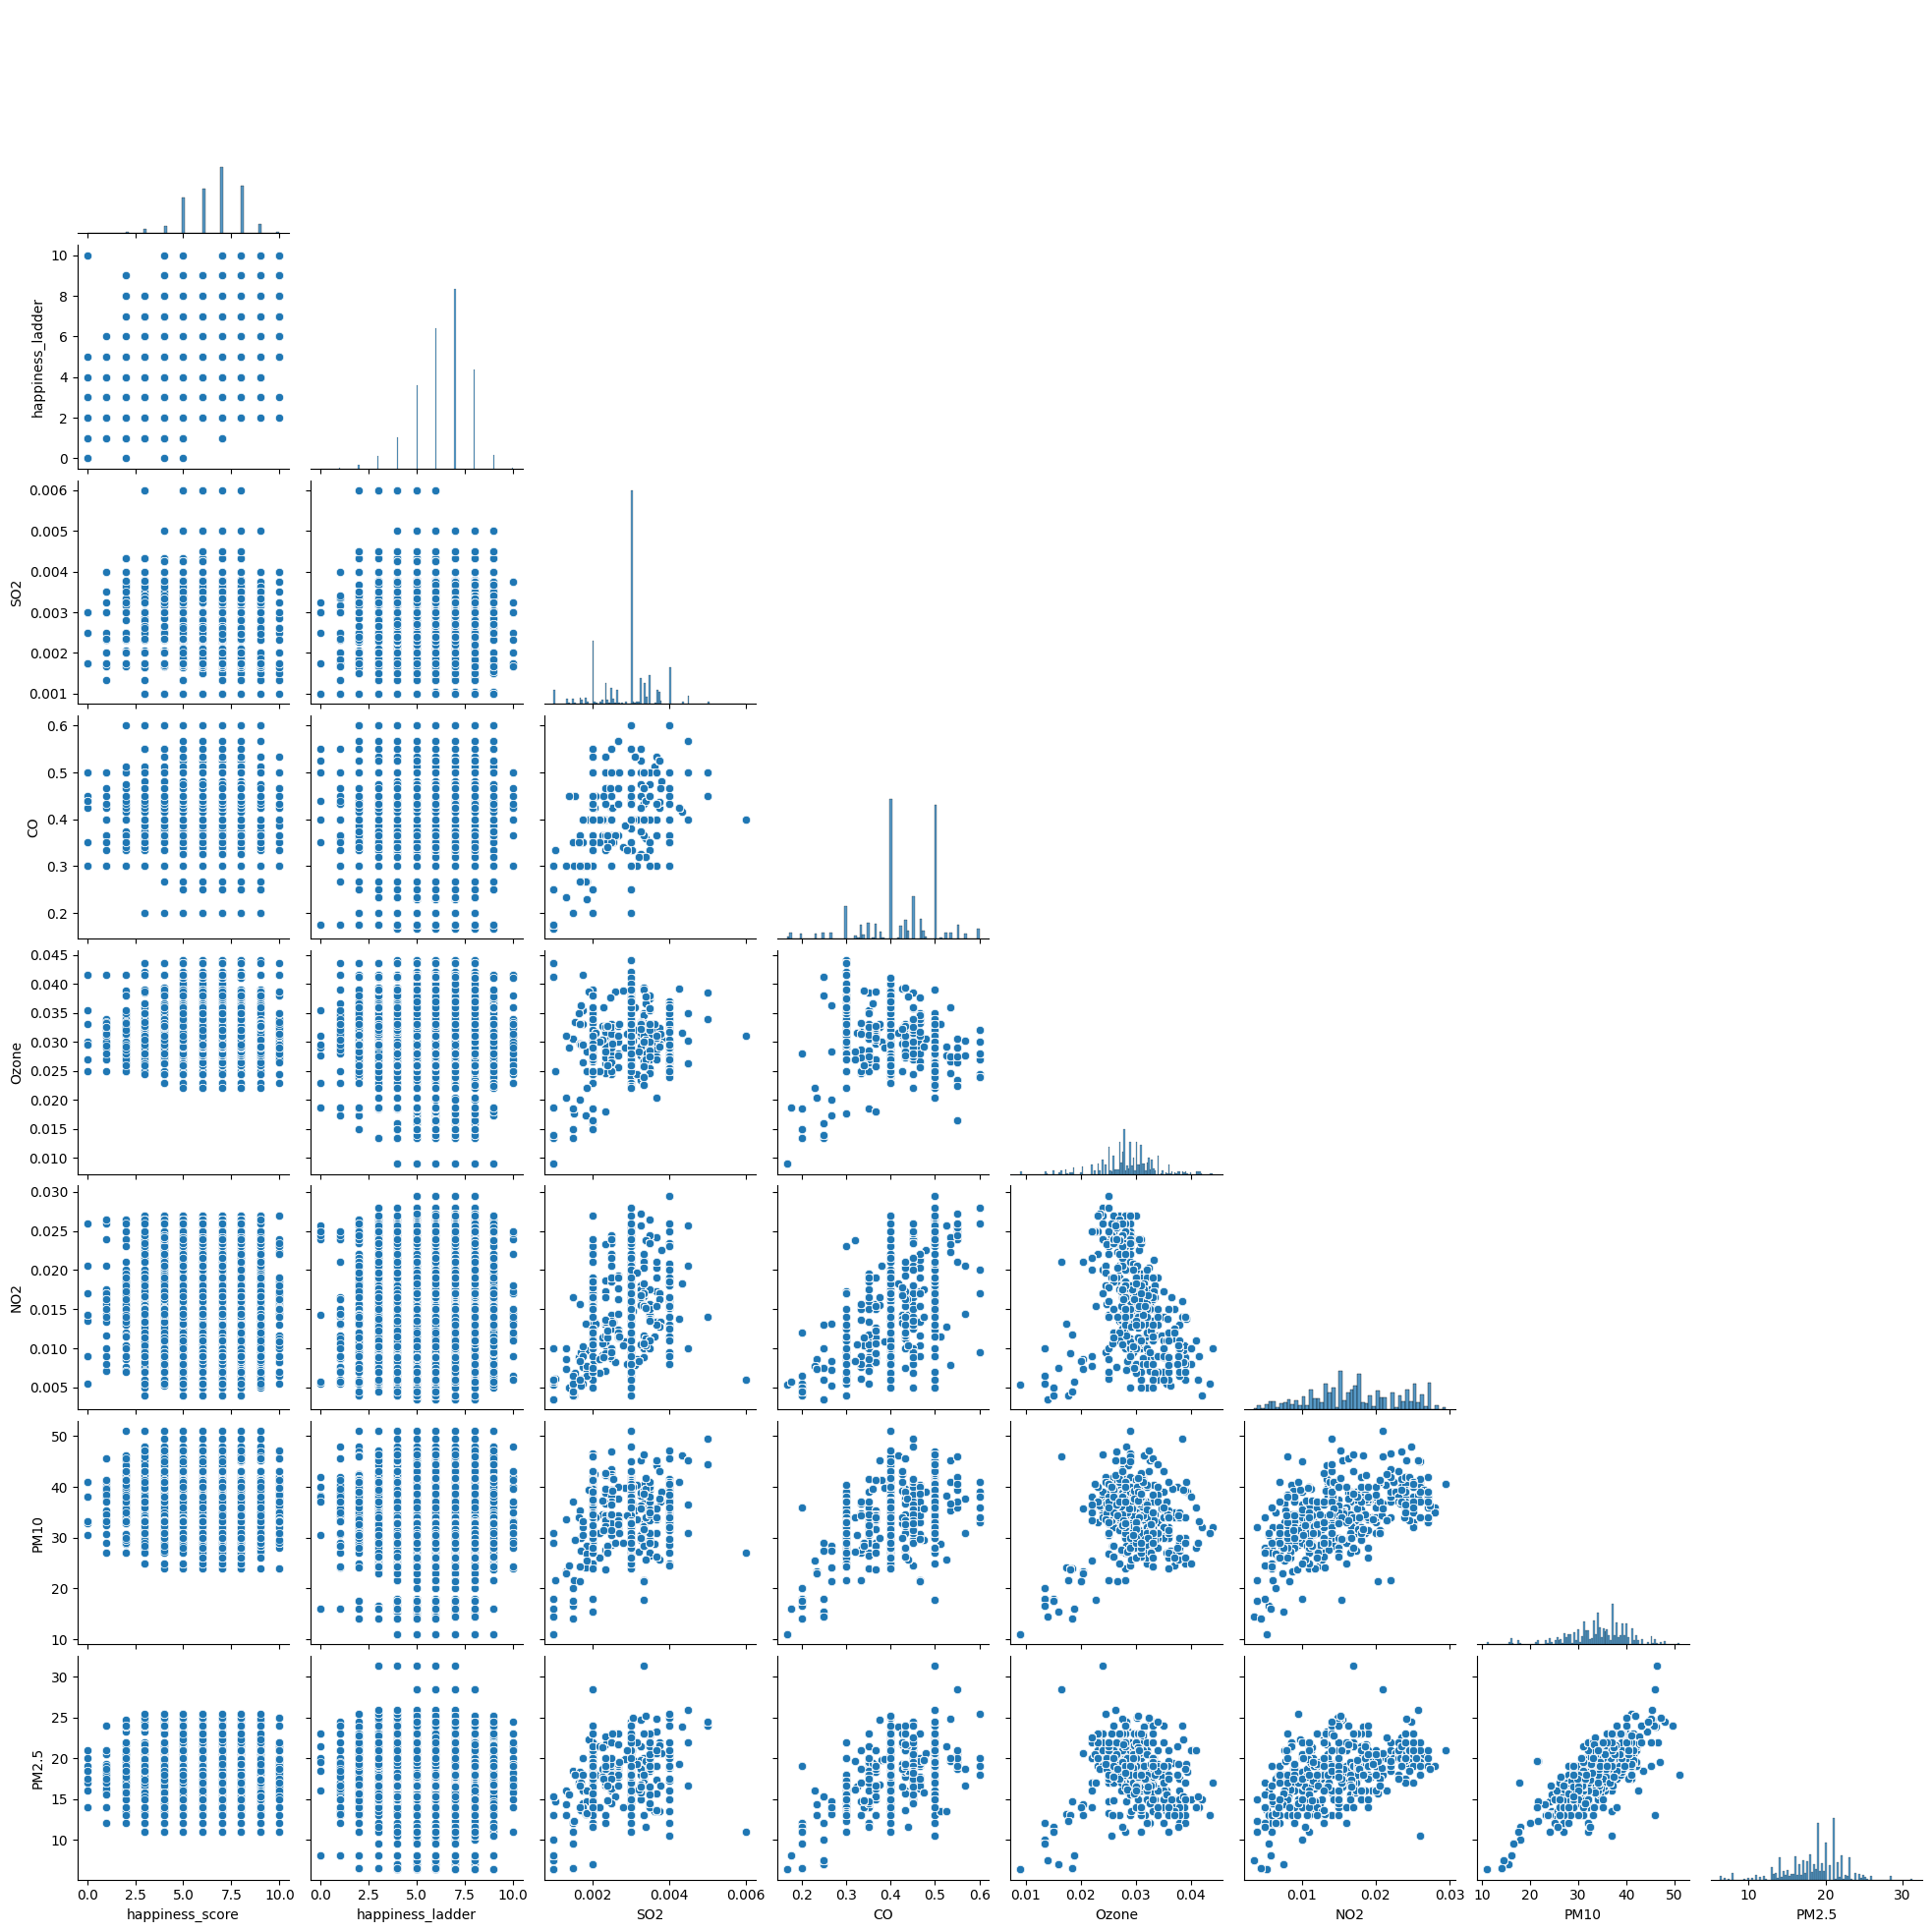

In [ ]:
sns.pairplot(df[['Happiness Score', 'Happiness Ladder','SO2','CO','Ozone','NO2','PM10','PM2.5']], corner=True)
plt.show()

## Correlation Analysis

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_factors.corr()
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
#plt.title('Correlation Matrix of Happiness and Factors')
plt.show()

##Regression Analysis

In [ ]:
import statsmodels.api as sm

In [ ]:
# Regression Analysis
# Define dependent and independent variables
X = data_factors.drop(columns=['Happiness'])
y = data_factors['Happiness']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the regression summary
print(model.summary())

In [ ]:
# Visualize the relationship between happiness score and each independent variable
independent_vars = X.columns[1:]  # Exclude the constant term
fig, axs = plt.subplots(6, 3, figsize=(10, 15))

for i, column in enumerate(independent_vars):
    # Plot happiness_score vs column
    sns.regplot(x=column, y='Happiness', data = data_factors, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_xlabel(column)
    axs[i // 3, i % 3].set_ylabel('Happiness Score')
    #axs[i // 3, i % 3].set_title(f'Relationship between Happiness Score and {column}')
    axs[i // 3, i % 3].grid(True)

axs[-1,-1].axis("off")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()